# SMOS sea ice thickness

### About the product

Daily Northern Hemisphere sea-ice thickness from ESA and the Alfred Wegener Institute.

https://doi.org/10.57780/sm1-5ebe10b

Good for **thin ice** (*"up to 0.5-1 m"*) and only **available in the freezing season** (October-April).

Derived from the `MIRAS` (Microwave Imaging Radiometer using Aperture Synthesis)
sensor on the `SMOS` (Soil Moisture and Ocean Salinity) satellite from ESA. 


___
**Note:** In general, it is a better idea to use the combined Cryosat-2 and SMOS product. Roughly, the former does well in >1 m sea ice (central Arctic) and the latter in <1 m (marginal ice zone, Barents Sea..).
___



### About the data

- Daily data.
- Time range: 2010-10-15 to near-present (15 days behind when checking).
- 12.5 km grid spacing.
- Northern hemisphere grid (>50°N).
- Sizeable pole hole

Some caveats from the product [technical note](https://spaces.awi.de/display/CS2SMOS/SMOS+Sea+Ice+Thickness?preview=/297634432/467536036/AWI_ESA_SMOS_RM_TN_v3.1.pdf): 

"*Data with an uncertainty > 1 m or with a saturation ratio above 95% should be 
used with caution*"

"*Data at the beginning and in particular at the end of processing periods (i.e. for April in the 
Arctic and for October in the Antarctic), as well as data in the marginal ice zone in lower 
latitudes should be used with greater caution due to the possible in
fluence of warm air 
temperatures on the retrieval*"

#### Access

- The files are opendap served at the Integrated Climate Data Center ICDC: https://icdc.cen.uni-hamburg.de/thredds/dodsC/smos_icethickness_2024
- Daily files are available, I think, but also *annual aggregated files* (which is what we load here). 
- Sea ice thickness: `sea_ice_thickness`
    - Thickness uncertainty is also provided.
    - In addition, a bunch of intermediate parameters including brightness temperature intensity.

#### Versions

- Version 3.3 is the current one as of May 2024, and the one we load here.

____

## Load the dataset

Lazy loading of the SMOS SIT data.

In [83]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import numpy as np

### Load data from one single year

In [84]:
url_smos_single_year = 'https://icdc.cen.uni-hamburg.de/thredds/dodsC/smos_icethickness_2024' # V1.0 (2020-> 2022)

In [15]:
ds_singleyear = xr.open_dataset(url_smos_single_year)

___

### Load all data
Concatenating annual files with`open_mfdataset`

In [22]:
all_annual_urls_smos = [
    f'https://icdc.cen.uni-hamburg.de/thredds/dodsC/smos_icethickness_{year}'
    for year in np.arange(2010, 2025)]

In [23]:
# Lazy loading the concatenated dataset (can take a few minutes)
ds_all = xr.open_mfdataset(all_annual_urls_smos)

___

#### Show the time stamps
- Concatenated files covers 2010-2024.
- Product is only available parts of the year.

Text(0, 0.5, 'SMOS L3\ntimestamps')

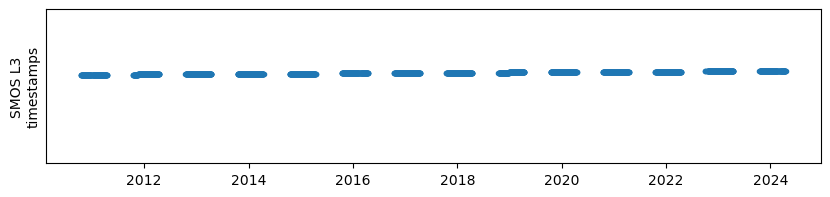

In [55]:
fig, ax = plt.subplots(figsize = (10, 2))
ax.plot(ds_all.time, ds_all.time, '.')
ax.set_ylim(-1e5, 1e5)
ax.set_yticks([])
ax.set_ylabel('SMOS L3\ntimestamps')

____

### *Example:* Plot SIT temperature on a particular day

##### Choose a date

In [85]:
date0 = '2019-03-02'

##### Make subsets of the files with only this date

In [86]:
ds_day = ds_all.sel(time = date0, method = 'nearest').squeeze()

**Plot sea ice thickness**

Text(0.5, 0.98, 'SMOS L3 SIT, 2019-03-02')

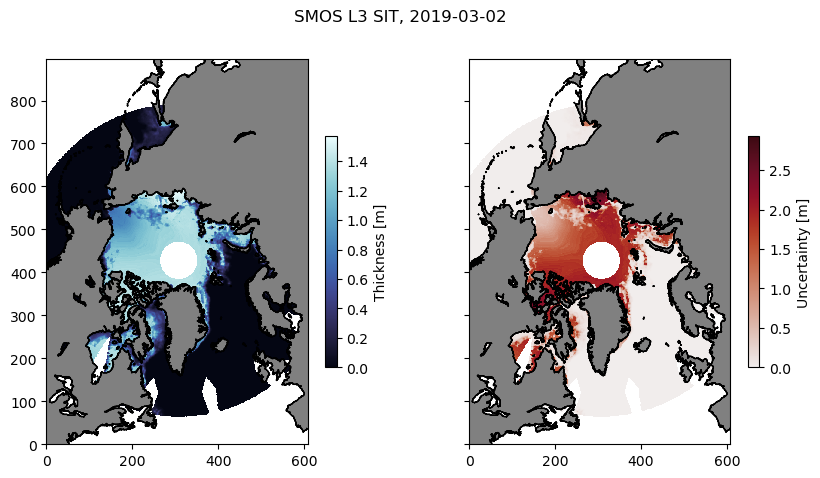

In [92]:
fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (10, 5))

for axn in ax:
    axn.set_aspect('equal')
    axn.contourf(ds_day.land, levels = [0, 0.5, 10], colors = ['none', 'gray', ])
    axn.contour(ds_day.land, colors = ['k',], linewidths = 0.7)

C0 = ax[0].pcolormesh(ds_day.sea_ice_thickness, cmap = cmocean.cm.ice)
cb0 = plt.colorbar(C0, shrink = 0.6,
             label = 'Thickness [m]')
C1 = ax[1].pcolormesh(ds_day.ice_thickness_uncertainty, cmap = cmocean.cm.amp)
cb1 = plt.colorbar(C1, shrink = 0.6,
             label = 'Uncertainty [m]')
fig.suptitle(f'SMOS L3 SIT, {str(ds_day.time.data)[:10]}')